In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import plot_tree
data = pd.read_excel('practice_lab_3.xlsx')
columns = list(data.columns)
mask = data['Gender'].values == 'Female'
mask_married = data['Married'].values == 'Yes'
mask_self_employed = data['Self_Employed'].values == 'Yes'
mask_education = data['Education'].values == "Graduate"
mask_status = data['Loan_Status'] == 'Y'
data.loc[mask, 'Gender'] = 1
data.loc[~mask, 'Gender'] = 0
data.loc[mask_married, 'Married'] = 1
data.loc[~mask_married, 'Married'] = 0
data.loc[mask_self_employed, 'Self_Employed'] = 1
data.loc[~mask_self_employed, 'Self_Employed'] = 0
data.loc[mask_education, 'Education'] = 1
data.loc[~mask_education, 'Education'] = 0
data.loc[mask_status, 'Loan_Status'] = 1
data.loc[~mask_status, 'Loan_Status'] = 0
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360,1,Urban,1
1,0,1,1,1,0,4583,1508.0,128.000000,360,1,Rural,0
2,0,1,0,1,1,3000,0.0,66.000000,360,1,Urban,1
3,0,1,0,0,0,2583,2358.0,120.000000,360,1,Urban,1
4,0,0,0,1,0,6000,0.0,141.000000,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360,1,Rural,1
610,0,1,3,1,0,4106,0.0,40.000000,180,1,Rural,1
611,0,1,1,1,0,8072,240.0,253.000000,360,1,Urban,1
612,0,1,2,1,0,7583,0.0,187.000000,360,1,Urban,1


In [2]:
cat_feature = pd.Categorical(data.Property_Area)
one_hot = pd.get_dummies(cat_feature)
data = pd.concat([data, one_hot], axis = 1)
data = data.drop(columns = ['Property_Area'])
data['Loan_Status'] = data['Loan_Status'].astype(int)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,0,0,0,1,0,5849,0.0,146.412162,360,1,1,0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360,1,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360,1,1,0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360,1,1,0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360,1,1,1,0,0
610,0,1,3,1,0,4106,0.0,40.000000,180,1,1,1,0,0
611,0,1,1,1,0,8072,240.0,253.000000,360,1,1,0,0,1
612,0,1,2,1,0,7583,0.0,187.000000,360,1,1,0,0,1


In [3]:
features = data.columns
vals = data.values.astype(np.float64)
y = data['Loan_Status'].values
X = data.drop(columns = ['Loan_Status']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
models = [kNN(), SVM()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

[[ 4 36]
 [10 73]]
[[ 0 40]
 [ 0 83]]


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
models = [kNN(), SVM()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

[[13 27]
 [ 3 80]]
[[13 27]
 [ 1 82]]


[[14 26]
 [ 1 82]]


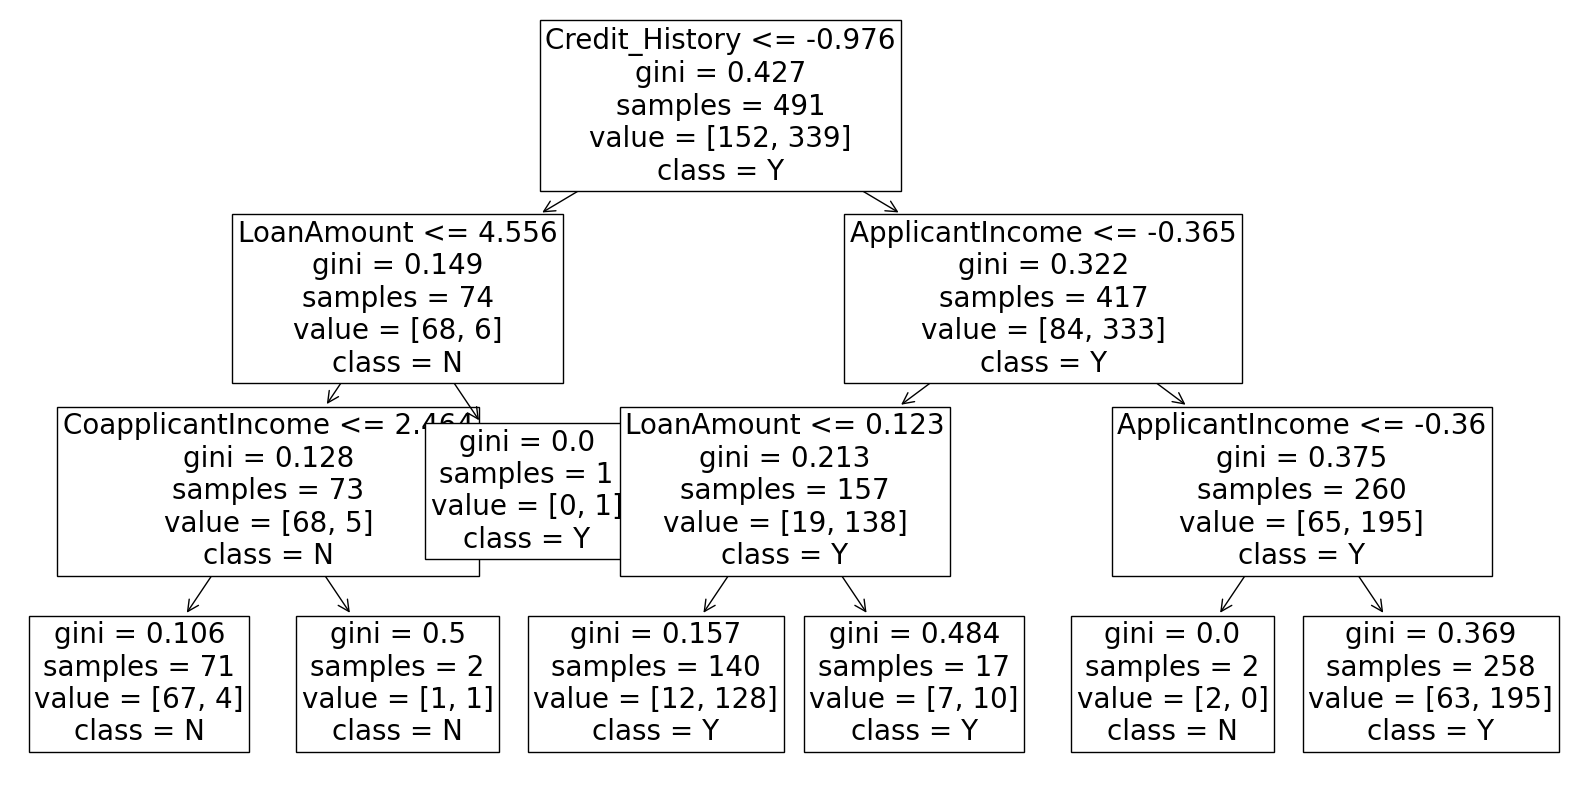

In [10]:
model = DT(max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (20, 10))
tree_vis = plot_tree(model, feature_names = data.columns[:-1].to_list(), class_names = ['N', 'Y'], fontsize = 20)